In [1]:
import tensorflow as tf


In [ ]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

In [48]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [5]:
import zipfile

# Unzip the dataset
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

In [49]:
import os
train_horse_dir=os.path.join('./horse-or-human/horses')
train_human_dir=os.path.join('./horse-or-human/humans')

In [50]:
train_horse_names=os.listdir(train_horse_dir)
train_human_names=os.listdir(train_human_dir)
len(train_human_names)

537

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [16]:
3*3*16*32+32

4640

## Explain the Convolutional layers and their filters
### 1. Convo2D (layer 1)
- input shape: a stack of n images, each image being the shape of (300,300,3) (3 channel colors)
- 16 filters: each filter being 3 * 3 * 3, the image passed to this filter would become the shape of (298 * 298): 3 channel colors being summed up into 2d image
              after one image passed to 16 filters, an image become a stack of 16 (298*298) images: 298 * 298 * 16
- The output of n images after going through the first convo layer is n * 298* 298* 16
- The number of params being trained: 3 * 3 * 3 * 16=448


In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255)
train_generator=train_datagen.flow_from_directory(
    './horse-or-human/',
    target_size=(300,300),
    batch_size=128,
    class_mode='binary')

Found 1036 images belonging to 2 classes.


In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mping
fhorse=train_horse_names[0]
fhuman=train_human_names[0]
image_path0=os.path.join('./horse-or-human/horses/',fhorse)
image_path1=os.path.join('./horse-or-human/humans/',fhuman)

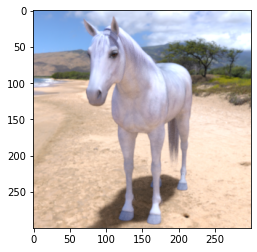

In [8]:
img=mping.imread(image_path0)
plt.imshow(img)

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

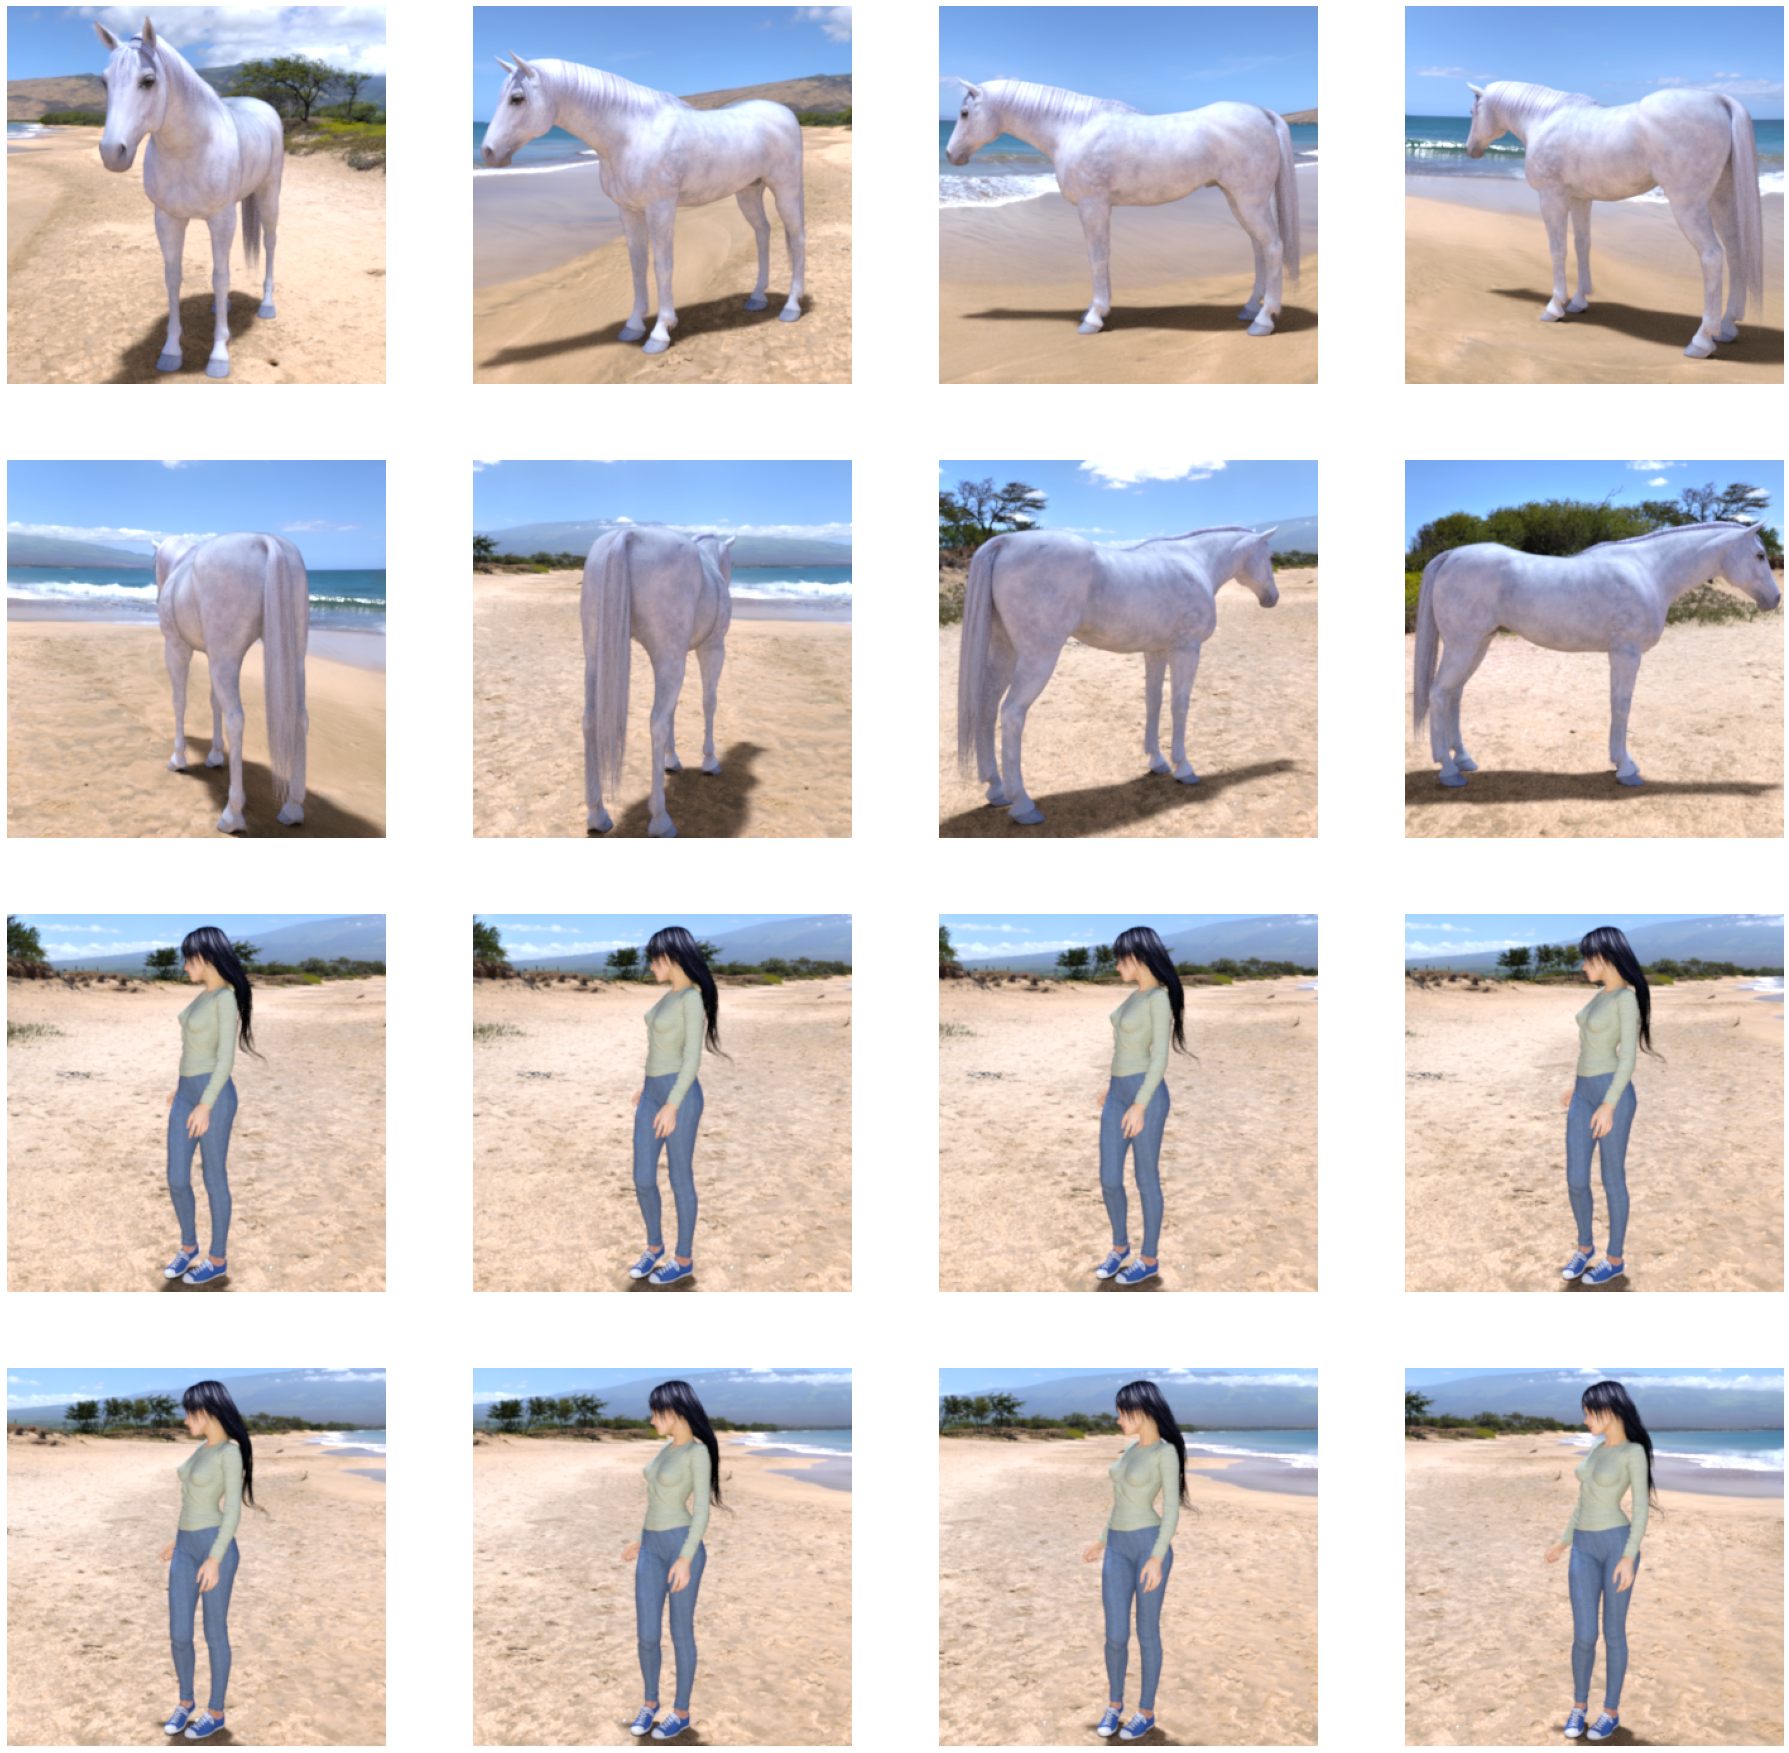

In [12]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 8, nrows * 8)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [52]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 26s 3s/step - loss: 1.0225 - accuracy: 0.6167
Epoch 2/15
8/8 [==============================] - 24s 3s/step - loss: 0.6776 - accuracy: 0.7104
Epoch 3/15
8/8 [==============================] - 27s 3s/step - loss: 0.7983 - accuracy: 0.7393
Epoch 4/15
8/8 [==============================] - 27s 3s/step - loss: 0.4146 - accuracy: 0.8232
Epoch 5/15
8/8 [==============================] - 27s 3s/step - loss: 0.2411 - accuracy: 0.9141
Epoch 6/15
8/8 [==============================] - 25s 3s/step - loss: 0.2718 - accuracy: 0.8965
Epoch 7/15
8/8 [==============================] - 24s 3s/step - loss: 0.1356 - accuracy: 0.9648
Epoch 8/15
8/8 [==============================] - 24s 3s/step - loss: 0.1527 - accuracy: 0.9416
Epoch 9/15
8/8 [==============================] - 24s 3s/step - loss: 0.1253 - accuracy: 0.9537
Epoch 10/15
8/8 [==============================] - 24s 3s/step - loss: 0.1244 - accuracy: 0.9604
Epoch 11/15
8/8 [======================

In [ ]:
class myCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if (logs.get('accuracy')>=0.95):
            print("n\Accuray higher than 95%. Stop training!")
            self.model.stop_training=True
callbacks=myCallbacks()


In [53]:
from ipywidgets import FileUpload
upload=FileUpload(multiple=True)
display(upload)

FileUpload(value={}, description='Upload', multiple=True)

In [42]:
upload.value.keys()

dict_keys(['horse.jpg'])

In [55]:
import numpy as np
from tensorflow.keras.preprocessing import image
for fn in upload.value.keys():
    path=os.path.join('./image/',fn)
    img=image.load_img(path,target_size=(300,300))
    x=image.img_to_array(img)
    x/=255
    x=np.expand_dims(x,axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    
    if classes[0]>0.5:
        print(fn + " is a human")
    else:
        print(fn + " is a horse")
 

    
    


[1.]
human5.png is a human


In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
# Defile a visualization model 
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)


In [11]:
visualization_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 300, 300, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496 

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [14]:
model_2=tf.keras.models.Model(inputs=model.input, outputs=model.output)

In [15]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 300, 300, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        1849

# Test with handpicked Images

In [43]:
from ipywidgets import FileUpload
upload=FileUpload(multiple=True)
display(upload)

FileUpload(value={}, description='Upload', multiple=True)

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
for fn in upload.value.keys():
    path=os.path.join('./image/',fn)
    img=image.load_img(path,target_size=(300,300))
    x=image.img_to_array(img)
    x/=255
    x=np.expand_dims(x,axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    
    if classes[0]>0.5:
        print(fn + " is a human")
        
    else:
        print(fn + " is a horse")
    
    

[9.50819e-11]
horse.jpg is a horse
[0.9591992]
horse1.jpg is a human
[0.0051817]
human.jpg is a horse
[0.99998784]
human1.jpg is a human
[1.]
human1.webp is a human
[0.99983823]
human2.jpg is a human
[1.6898016e-10]
human3.jpg is a horse
[2.5671454e-08]
human3-resized.jpg is a horse
[3.6642385e-05]
human4.jpg is a horse


In [21]:
image_dir=os.path.join('./image')
image_names=os.listdir(image_dir)


                       

                       

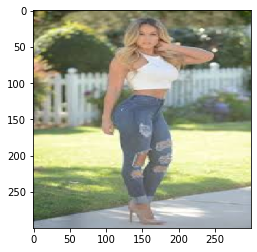

In [46]:
import matplotlib.image as mpimg
fn=image_names[5]
path=os.path.join(image_dir,'human.jpg')
img=image.load_img(path,target_size=(300,300))
#img = mpimg.imread(path)
plt.imshow(img)


    